<a href="https://colab.research.google.com/github/MizanMustakim/sign_language_mnist/blob/main/sign_language_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

Dataset from https://www.kaggle.com/datamunge/sign-language-mnist

In [2]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [2]:
def get_data(filename):
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter= ",")
        imgs = []
        labels = []
        next(reader, None)
        
        for row in reader:
            label = row[0]
            data = row[1:]
            img = np.array(data).reshape((28, 28))

            imgs.append(img)
            labels.append(label)

        images = np.array(imgs).astype(float)
        labels = np.array(labels).astype(float)
    return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')


print("Training Image shape:",training_images.shape)
print("Training Label shape:",training_labels.shape)
print("Testing Image shape:",testing_images.shape)
print("Testing Label shape:",testing_labels.shape)

Training Image shape: (27455, 28, 28)
Training Label shape: (27455,)
Testing Image shape: (7172, 28, 28)
Testing Label shape: (7172,)


In [3]:
# In this section we will have to add another dimension to the data
# So, for example, if our array is (10000, 28, 28)
# We will need to make it (10000, 28, 28, 1)

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation and create generator
train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    shear_range= 0.1,
    zoom_range= 0.1,
    horizontal_flip= True,
    fill_mode= "nearest"
)

train_gen = train_datagen.flow(
    training_images,
    training_labels,
    batch_size= 64
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    shear_range= 0.1,
    zoom_range= 0.1,
    horizontal_flip= True,
    fill_mode= "nearest")

val_gen = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size= 64
)   

print("Training Image shape:",training_images.shape)
print("Testing Image shape:",testing_images.shape)

Training Image shape: (27455, 28, 28, 1)
Testing Image shape: (7172, 28, 28, 1)


In [10]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile Model. 
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_gen,
    epochs=30,
    validation_data=val_gen)

model.evaluate(testing_images, testing_labels, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
429/429 [==============================] - 31s 71ms/step - loss: 2.7024 - accuracy: 0.1402 - val_loss: 2.3253 - val_accuracy: 0.2418
Epoch 2/30
429/429 [==============================] - 30s 70ms/step - loss: 1.8847 - accuracy: 0.3710 - val_loss: 1.6735 - val_accuracy: 0.4276
Epoch 3/30
429/429 [==============================] - 30s 70ms/step - loss: 1.4897 - accuracy: 0.4916 - val_loss: 1.3747 - val_accuracy: 0.5209
Epoch 4/30
429/429 [==============================] - 30s 70ms/step - loss: 1.2388 - accuracy: 0.5720 - val_loss: 1.2879 - val_accuracy: 0.5464
Epoch 5/30
429/429 [==============================] - 30s 70ms/step - loss: 1.0664 - accuracy: 0.6355 - val_loss: 1.1053 - val_accuracy: 0.6095
Epoch 6/30
429/429 [==============================] - 30s 70ms/step - loss: 0.9253 - accuracy: 0.6749 - val_loss: 1.0101 - val_accuracy: 0.6417
Epoch 7/30
429/429 [==============================] - 30s 70ms/step - loss: 0.8165 - accuracy: 0.7145 - val_loss: 0.8981 - val_accuracy:

[147.10438537597656, 0.748047947883606]

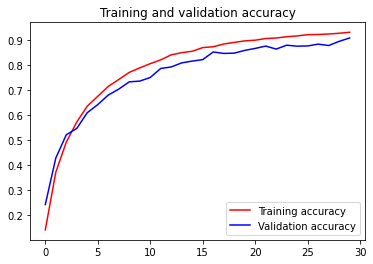

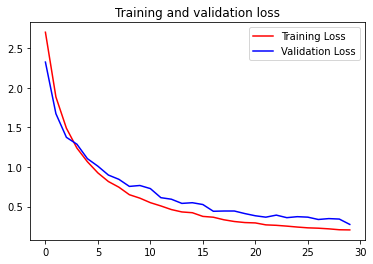

In [11]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()